
# 100 Años de Ataques de Tiburón 🦈  
**Exploratory Data Analysis (EDA)**  



## 1. Introducción  
Durante muchos años, los tiburones han sido vistos como los grandes **monstruos del mar**. Pero, ¿realmente lo confirman los datos?
Este estudio revisa los incidentes registrados a lo largo del tiempo por el Global Shark Attack File y organizados en este repositorio.

El objetivo es **contrastar cinco hipótesis** empleando Python y visualizaciones.



## 2. Hipótesis  

| Nº | Enunciado | Métrica clave |
|---|--------------------------------------------------------------|---------------------------|
| 1 | *El miedo es irracional* (el riesgo individual es bajísimo) | Ataques por persona‑año |
| 2 | *Los ataques disminuyen con el tiempo* | Tendencia de incidentes |
| 3 | *La números relativos no aumenta* | % de ataques por años |
| 4 | *Los hombres sufren más ataques* | Distribución por sexo |
| 5 | *El surf es la actividad más expuesta* | % por tipo de actividad |


## 3. Entorno y carga de datos

In [ ]:

# Librerías
import os, json, math, warnings
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats

# Dataset principal 
df_shark = pd.read_csv(r'./src/data/shark_attack_clean.csv')
# Dataset scrapeado para enriquecer el principal y utilizarlo como comparativa
df_tourism = pd.read_csv(r'./src/data/turismo_mundial.csv')
# Dataset creado para ayudar a la creación de las gráficas, gracias a la suma de los dos principales
df_totales = pd.read_csv(r'./src/data/totales.csv')
# Dataset creado para ayudar a la creación de las gráficas, gracias a la suma de los dos principales
df_totalesXpais = pd.read_csv(r'./src/data/totales_x_pais.csv')


### Df_shark

In [5]:
df_shark.head()

,Unnamed: 0,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,species,activity2
0,0,2023-05-13,2023,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,Y,White shark,Surfing
1,1,2023-04-29,2023,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,Unknow,N,1m shark,Swimming
2,2,2022-10-07,2022,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,N,Bull shark,Fishing
3,3,2021-10-04,2021,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,N,Unknow,Surfing
4,4,2021-10-03,2021,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,Unknow,N,Unknow,Swimming


### Df_tourism

In [6]:
df_tourism.head()

,Unnamed: 0,pais,1995,1996,1997,1998,1999,2000,2001,2002,...,2017,2018,2019,2020,2021,2022,2023,2024,1994,1993
0,0,españa,32971000.0,34027000.0,39553000.0,41892000.0,45440000.0,46402926.0,48565344.0,50330623.0,...,81868522.0,82808413.0,83509153.0,18933103.0,31180802.0,71659281.0,85169050.0,93759297.0,NaN,NaN
1,1,alemania,14847000.0,15205000.0,15837000.0,16511000.0,17116000.0,18983000.0,17861000.0,17969000.0,...,37452000.0,38881000.0,39563000.0,12449000.0,11688000.0,28463000.0,NaN,NaN,NaN,NaN
2,2,reino-unido,21719000.0,22936000.0,23215000.0,23710000.0,23341000.0,23212000.0,20982000.0,22307000.0,...,39543000.0,38664000.0,39418000.0,10714000.0,6287000.0,30741000.0,NaN,NaN,NaN,NaN
3,3,francia,60033000.0,62406000.0,66591000.0,70109000.0,73147000.0,77190000.0,75202000.0,77012000.0,...,86758000.0,89322000.0,90914000.0,41684000.0,48395000.0,NaN,NaN,NaN,NaN,NaN
4,4,italia,31052000.0,34080000.0,34692000.0,34933000.0,36516000.0,41181000.0,39563000.0,39799000.0,...,58253000.0,61567200.0,64513000.0,25190000.0,26888000.0,49811000.0,NaN,NaN,NaN,NaN


### Df_totales

In [7]:
df_totales.head()

,Unnamed: 0,year,count_turistas,year.1,count_ataques,porcentaje
0,0,1995,244795350.0,1995.0,64,0.000026
1,1,1996,258435067.0,1996.0,49,0.000019
2,2,1997,270880055.0,1997.0,51,0.000019
3,3,1998,279808107.5,1998.0,59,0.000021
4,4,1999,294018094.5,1999.0,60,0.000020


### Df_totalesXpais

In [8]:
df_totalesXpais.head()

,Unnamed: 0,country,totales_ataques,totales_turistas
0,0,ANGOLA,1,6491014.0
1,1,ANTIGUA,1,6641511.0
2,2,ARGENTINA,2,124432015.0
3,3,AUSTRALIA,1185,143701917.0
4,4,AZORES,4,29630018.0



### 3.1 Descarga y limpieza de datos  
En la carpeta `src/notebook/Descarga_Procesamiento.ipynb`, se explica paso a paso el proceso de conexión a la API, la descarga de los datos, la creación del dataset y el procesamiento de los datos.


### 3.2  Scrapping y enriquecimiento del dataset principal
En la carpeta `src/notebook/scrapping_turismo.ipynb`, se explica paso a paso el proceso de scrapping de la web [https://datosmacro.expansion.com], y la creación del dataset con los datos de turismo.

## 4. Contraste de Hipótesis

### 4.1 Evolución del número de ataques (H2)

Hipotesis en la que claramente me equivoco ya que en números absolutos los ataques aumentan por año.

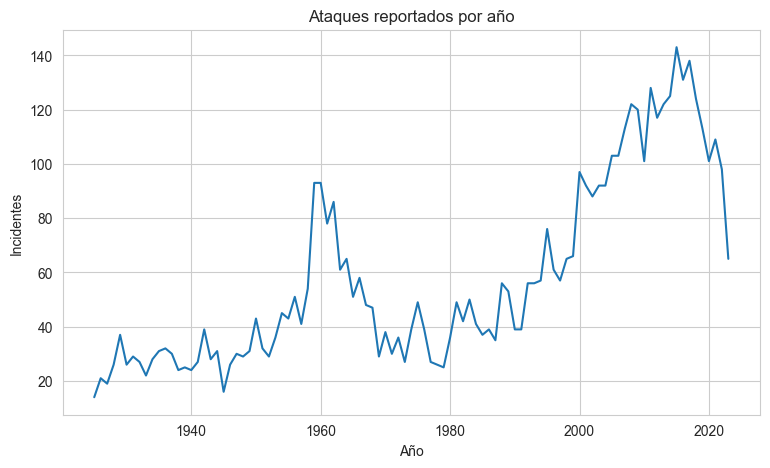

In [12]:

attacks_year = df_shark.groupby('year').size()
sns.lineplot(x=attacks_year.index, y=attacks_year.values)
plt.title('Ataques reportados por año')
plt.xlabel('Año'); plt.ylabel('Incidentes')
plt.show()


### 5.2 Porcentaje de ataques no aumenta a lo largo de los años (H3)

Esta hipótesis es acertada ya que exceptuando el periodo de 2020 (año de la pandemia) el resto de los años el porcentaje de ataques se mantiene.

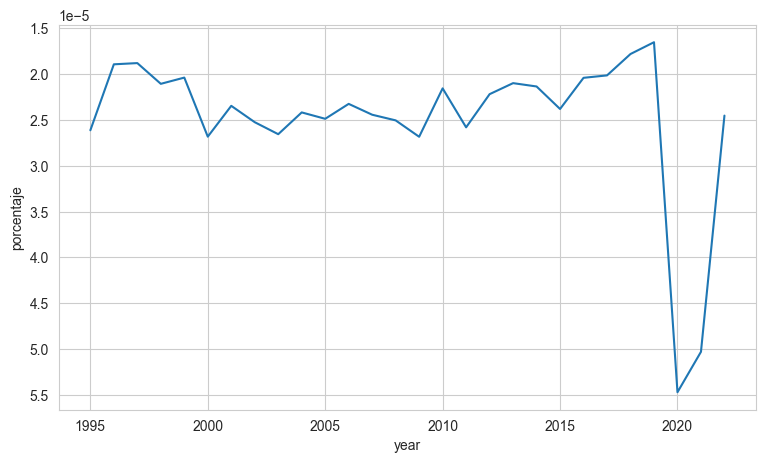

In [16]:
sns.lineplot(x=df_totales['year'], y=df_totales['porcentaje'])
plt.gca().invert_yaxis() 
plt.show()

### 5.3 Distribución de víctimas por sexo (H4)

En esta hipotesis se creía que los hombres tenian más probabilidades de sufrir un ataque, y en este caso también se acerto 

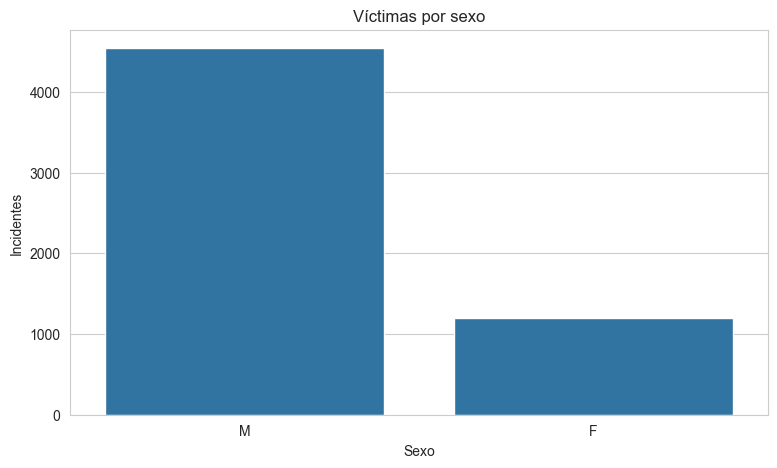

In [18]:

sex_ct = df_shark['sex'].value_counts().loc[['M','F']]
sns.barplot(x=sex_ct.index, y=sex_ct.values)
plt.title('Víctimas por sexo'); plt.ylabel('Incidentes'); plt.xlabel('Sexo')
plt.show()


### 5.4 Riesgo por actividad: foco en el surf (H5)

Creía que el aumento de los deportes acuaticos y en concreto el surf había sufrido un aumento de ataques, por el aumento de su practica y por buscar sitios más arriesgados y menos vigilados.

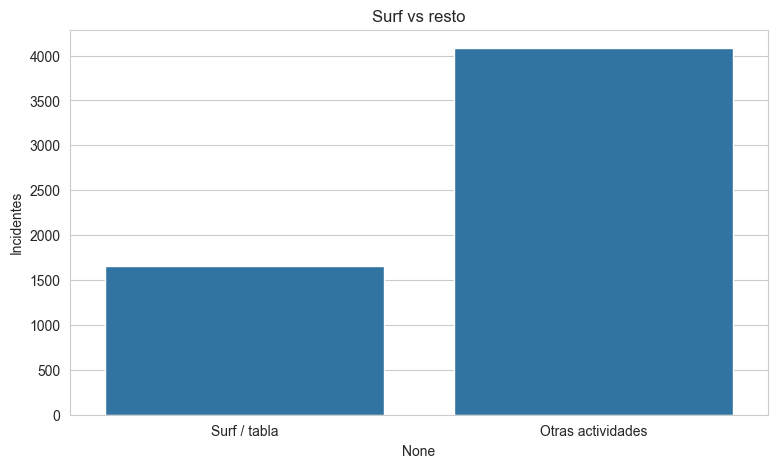

El 28.8% de los ataques implican surfistas o deportes de tabla


In [21]:

surf_mask = df_shark['activity'].str.contains('surf', case=False, na=False) | df_shark['activity'].str.contains('board', case=False, na=False)
cat_counts = pd.Series({'Surf / tabla': surf_mask.sum(),
                        'Otras actividades': (~surf_mask).sum()})
sns.barplot(x=cat_counts.index, y=cat_counts.values)
plt.ylabel('Incidentes'); plt.title('Surf vs resto')
plt.show()

prop_surf = cat_counts['Surf / tabla'] / cat_counts.sum()
print(f'El {prop_surf:.1%} de los ataques implican surfistas o deportes de tabla')


### 5.5 ¿Es irracional el miedo? (H1)

In [23]:

    
total_ataques = df_totales['count_ataques'].sum()
total_turistas = df_totales['count_turistas'].sum()

print("## Ataques de tiburón")
print(f"#### 1 ataque por cada {round(total_turistas/total_ataques):,} una probabilidad de {(total_ataques/total_turistas)*100:.6f}")


## Ataques de tiburón
#### 1 ataque por cada 4,280,936 una probabilidad de 0.000023



## 6. Conclusiones  

| Hipótesis | Resultado | Evidencia |
|-----------|-----------|-----------|
| H1 | **Apoyada** | Riesgo de 1 cada 4,000,000 de persona |
| H2 | **Débil** | Pendiente ascendente, cada año hay más ataques |
| H3 | **Apoyada** | Pendiente neutra, el porcentaje se mantiene |
| H4 | **Apoyada** |  9 de cada 10 víctimas son hombres |
| H5 | **Apoyada** | Más o menos 1/3 de los ataques ocurren durante surf/tabla |

### Líneas futuras  
* Filtrar las conclusiones por tambien por año.  
* Continuar con la linea de investigación de los cambios de temperatura del agua, recopilando más datos.  
